#  Compute Label time course using SVD

In [3]:
import pycartool as cart
import numpy as np
import matplotlib.pyplot as plt

#### Import  from Cartool files

In [63]:
fname_spi = 'MNI152.NlinAsym09c.204.5000.2017.spi'
fname_roi = 'MNI152.NlinAsym09c.204.5000.2017.AAL.rois'

spi = cart.source_space.read_spi(fname_spi)
roi = cart.regions_of_interest.read_roi(fname_roi, spi)

RO01
Dimension_of_original_data: 5004
Number of ROI: 114


#### Constants

In [5]:
sfreq = 512
n_sources = len(spi.names)
snr = 10
n_times = 2048

### Simulate sources time course

Here we simulate the sources time course as random noise generators everywhere in the brain, expect in the first Region of interest where sources time course are simulated are sin waves in the x direction.

#### Create random noise

In [56]:
simulated_tc = np.random.normal(size=(n_sources, 3, n_times))

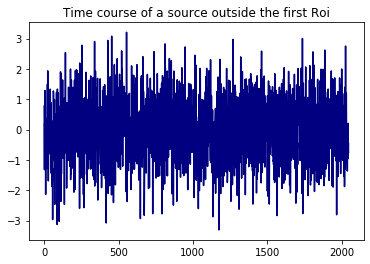

In [59]:
plt.figure()
plt.plot(simulated_tc[0,0], color='navy')
plt.title('Time course of a source outside the first Roi')
plt.show()

#### Create sin wave in Roi

In [60]:
x = np.arange(0,n_times,1)
sin = snr * np.sin(x/(2 * np.pi))

In [51]:
for elem in roi.groups_of_indexes[0]:
    simulated_tc[elem][0] = sin
    simulated_tc[elem][1] = np.zeros(sin.shape)
    simulated_tc[elem][2] = np.zeros(sin.shape)

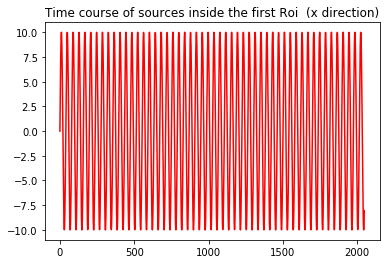

In [61]:
plt.figure()
plt.plot(sin, color ='red')
plt.title('Time course of sources inside the first Roi  (x direction)')
plt.show()

In [53]:
source_estimate_simulated = cart.source_estimate.SourceEstimate(simulated_tc, sfreq=sfreq, source_space=spi)

#### Compute the regions of interest time course

In [54]:
roi_t_simulated = source_estimate_simulated.compute_rois_tc(roi)

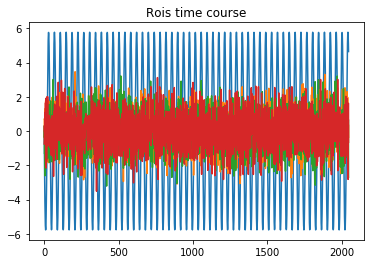

In [62]:
plt.figure()
plt.plot(roi_t_simulated.sources_tc[0:4,0,:].T)
plt.title('Rois time course')
plt.show()